### importing essential libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### loading dataset

In [2]:
data=pd.read_csv('Mall_Customers.csv')

### displaying first five rows

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### displaying last five rows

In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### checkin null values in the dataset

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### kmeans clustering

In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
X=data[['Annual Income (k$)',
       'Spending Score (1-100)']]

In [11]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
from sklearn.cluster import KMeans

In [14]:
k_means=KMeans()

In [15]:
k_means.fit(X)

KMeans()

In [16]:
k_means=KMeans()
k_means.fit_predict(X)

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 6, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 6, 4, 6, 6,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 7, 5, 0, 5, 7, 5, 7, 5,
       0, 5, 7, 5, 7, 5, 7, 5, 7, 5, 0, 5, 7, 5, 0, 5, 7, 5, 7, 5, 7, 5,
       7, 5, 7, 5, 7, 5, 0, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5, 7, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

### elbow method to find optimum numbers of clusters

In [19]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
wcss

[269981.28000000014,
 181665.82312925166,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25063.652515864094,
 21797.08494464637,
 19636.75396489815]

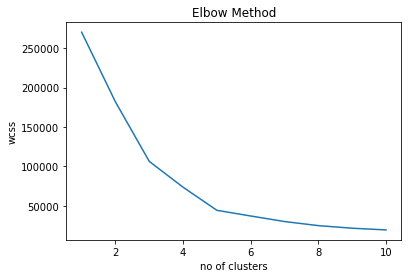

In [21]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

### model training

In [22]:
X=data[['Annual Income (k$)',
       'Spending Score (1-100)']]

In [23]:
k_means=KMeans(n_clusters=5,random_state=42)
ymeans=k_means.fit_predict(X)

In [24]:
ymeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

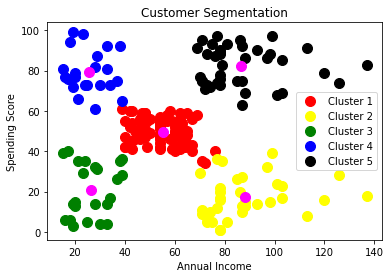

In [26]:
plt.scatter(X.iloc[ymeans==0,0],X.iloc[ymeans==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[ymeans==1,0],X.iloc[ymeans==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(X.iloc[ymeans==2,0],X.iloc[ymeans==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(X.iloc[ymeans==3,0],X.iloc[ymeans==3,1],s=100,c='blue',label="Cluster 4")
plt.scatter(X.iloc[ymeans==4,0],X.iloc[ymeans==4,1],s=100,c='black',label="Cluster 5")
plt.legend()
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [27]:
k_means.predict([[15,39]])

array([2])